In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('matches1.csv')

In [3]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
# returns no. of rows and cols
df.shape

(1095, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [6]:
# Cleaning the matches dataset
df['city'] = df['city'].fillna('Unknown')
df['result_margin'] = df['result_margin'].fillna(0)
df['target_runs'] = df['target_runs'].fillna(0)
df['target_overs'] = df['target_overs'].fillna(0)
df['method'] = df['method'].fillna('Normal')

In [7]:
df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1095.000000,1095.000000,1095.000000
mean,9.048283e+05,16.959817,165.230137,19.705205
std,3.677402e+05,21.714792,34.487313,1.887000
min,3.359820e+05,0.000000,0.000000,0.000000
25%,5.483315e+05,5.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,19.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [8]:
# Calculating the number of matches each team has played
team_matches_played = df.groupby('team1')['id'].nunique() + df.groupby('team2')['id'].nunique()
team_matches_played

team1
Chennai Super Kings            238
Deccan Chargers                 75
Delhi Capitals                  91
Delhi Daredevils               161
Gujarat Lions                   30
Gujarat Titans                  45
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          251
Lucknow Super Giants            44
Mumbai Indians                 261
Pune Warriors                   46
Punjab Kings                    56
Rajasthan Royals               221
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    240
Royal Challengers Bengaluru     15
Sunrisers Hyderabad            182
Name: id, dtype: int64

In [9]:
# Calculate the number of matches each team has won
team_wins = df.groupby('winner')['id'].nunique().sort_values(ascending=False)
team_wins

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: id, dtype: int64

In [10]:
# Calculating the winning percentage
team_win_percentage = ((team_wins / team_matches_played) * 100).sort_values(ascending=False)
team_win_percentage.round(2)

Rising Pune Supergiant         62.50
Gujarat Titans                 62.22
Chennai Super Kings            57.98
Mumbai Indians                 55.17
Lucknow Super Giants           54.55
Delhi Capitals                 52.75
Kolkata Knight Riders          52.19
Rajasthan Royals               50.68
Sunrisers Hyderabad            48.35
Royal Challengers Bangalore    48.33
Royal Challengers Bengaluru    46.67
Kings XI Punjab                46.32
Gujarat Lions                  43.33
Kochi Tuskers Kerala           42.86
Punjab Kings                   42.86
Delhi Daredevils               41.61
Deccan Chargers                38.67
Rising Pune Supergiants        35.71
Pune Warriors                  26.09
Name: id, dtype: float64

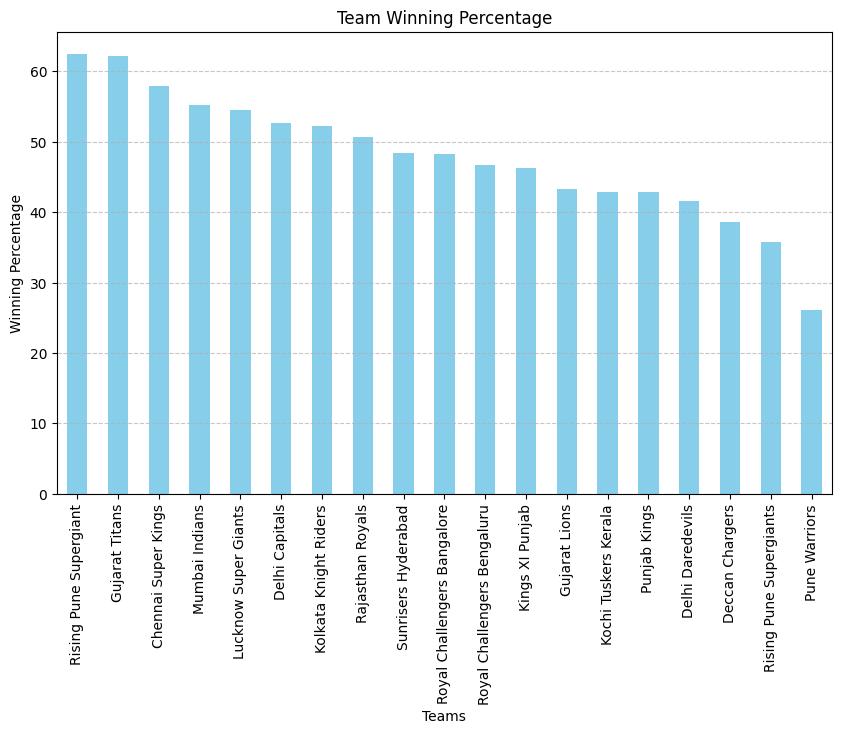

In [11]:
# Plotting the winning percentage of each team
plt.figure(figsize=(10, 6))
team_win_percentage.plot(kind='bar', color='skyblue')
plt.title('Team Winning Percentage')
plt.xlabel('Teams')
plt.ylabel('Winning Percentage')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [12]:
df.iloc[0]

id                                      335982
season                                 2007/08
city                                 Bangalore
date                                2008-04-18
match_type                              League
player_of_match                    BB McCullum
venue                    M Chinnaswamy Stadium
team1              Royal Challengers Bangalore
team2                    Kolkata Knight Riders
toss_winner        Royal Challengers Bangalore
toss_decision                            field
winner                   Kolkata Knight Riders
result                                    runs
result_margin                            140.0
target_runs                              223.0
target_overs                              20.0
super_over                                   N
method                                  Normal
umpire1                              Asad Rauf
umpire2                            RE Koertzen
Name: 0, dtype: object

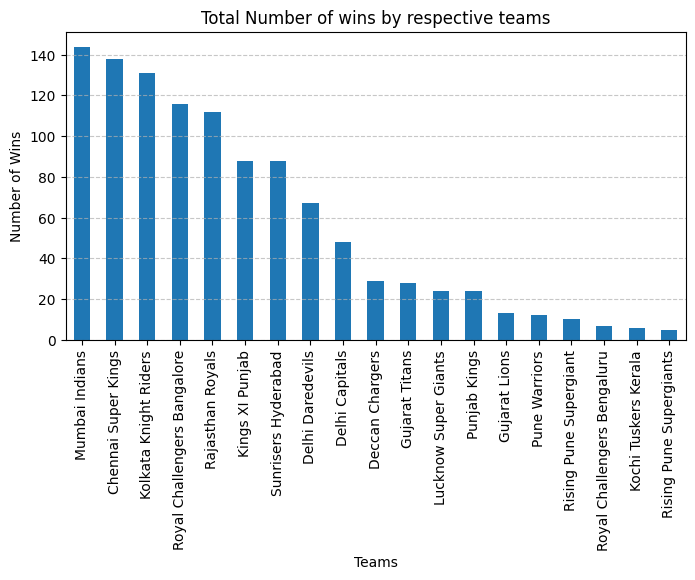

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
df['winner'].value_counts().plot(kind='bar')

plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Total Number of wins by respective teams')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

<Axes: ylabel='count'>

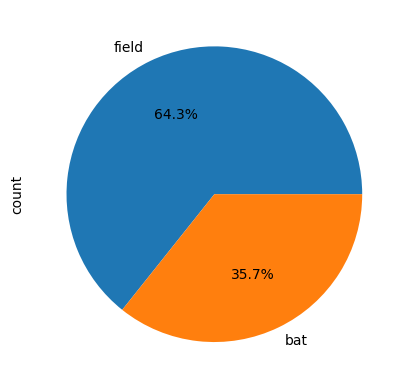

In [14]:
df['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [15]:
(df['team2'].value_counts() + df['team1'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 261
Kolkata Knight Riders          251
Royal Challengers Bangalore    240
Chennai Super Kings            238
Rajasthan Royals               221
Kings XI Punjab                190
Sunrisers Hyderabad            182
Delhi Daredevils               161
Delhi Capitals                  91
Deccan Chargers                 75
Punjab Kings                    56
Pune Warriors                   46
Gujarat Titans                  45
Lucknow Super Giants            44
Gujarat Lions                   30
Rising Pune Supergiant          16
Royal Challengers Bengaluru     15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

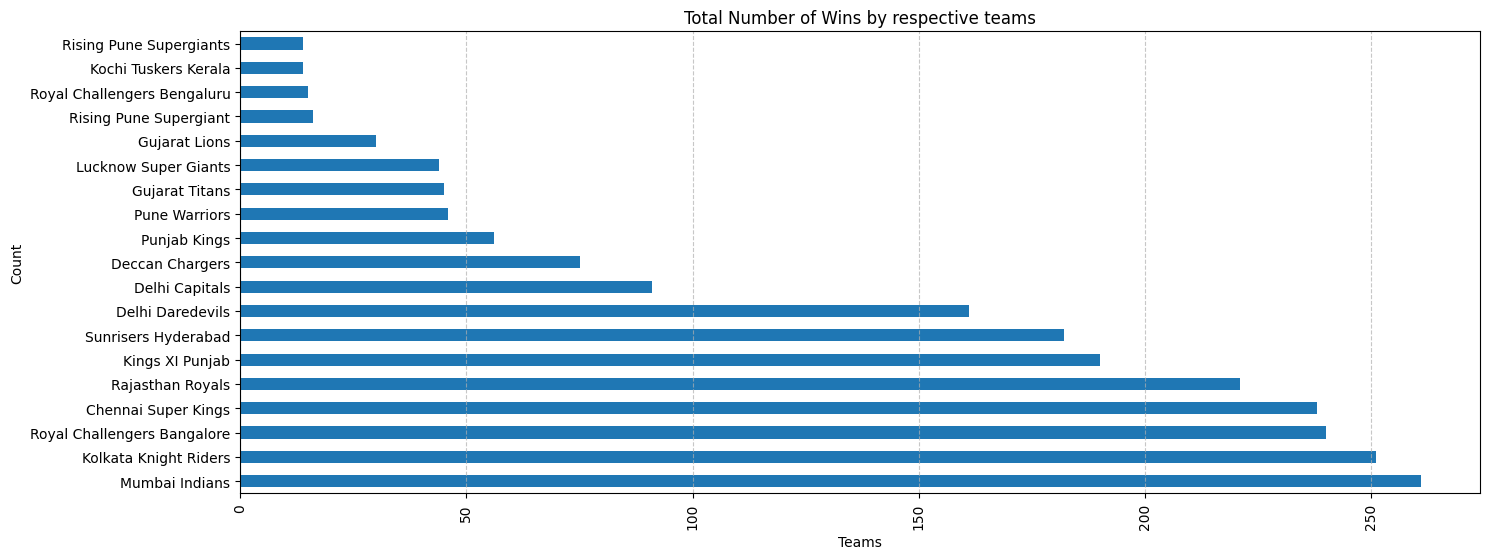

In [16]:
team_counts = (df['team1'].value_counts() + df['team2'].value_counts()).sort_values(ascending=False)

# Plot
plt.figure(figsize=(16, 6))
team_counts.plot(kind='barh')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.title('Total Number of Wins by respective teams')
plt.xticks(rotation=90)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [17]:
df.drop_duplicates('season', keep='last')[['season','winner']].sort_values('season')

,season,winner
57,2007/08,Rajasthan Royals
114,2009,Deccan Chargers
174,2009/10,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad
635,2017,Mumbai Indians


In [18]:
# reading new file i.e., the data of all deliveries across seasons
delivery = pd.read_csv('deliveries1.csv')

In [19]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [20]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


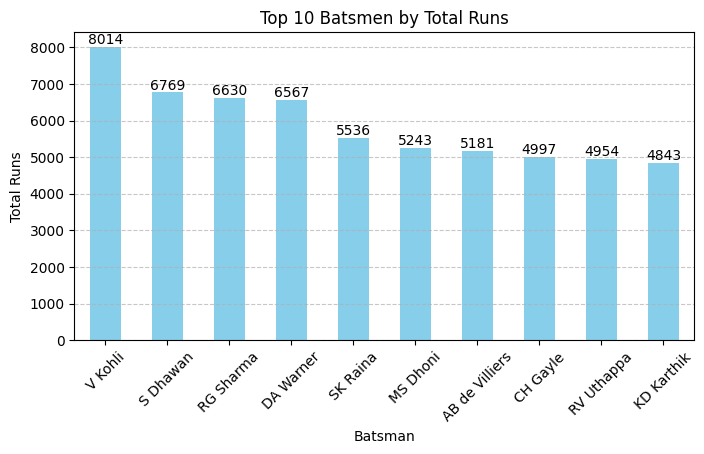

In [21]:
top_batsmen = delivery.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(8,4))
tb = top_batsmen.plot(kind='bar', color='skyblue')

# Adding annotations
for i, value in enumerate(top_batsmen):
    tb.text(i, value + 0.1, str(value), ha='center', va='bottom')
    
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.title('Top 10 Batsmen by Total Runs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

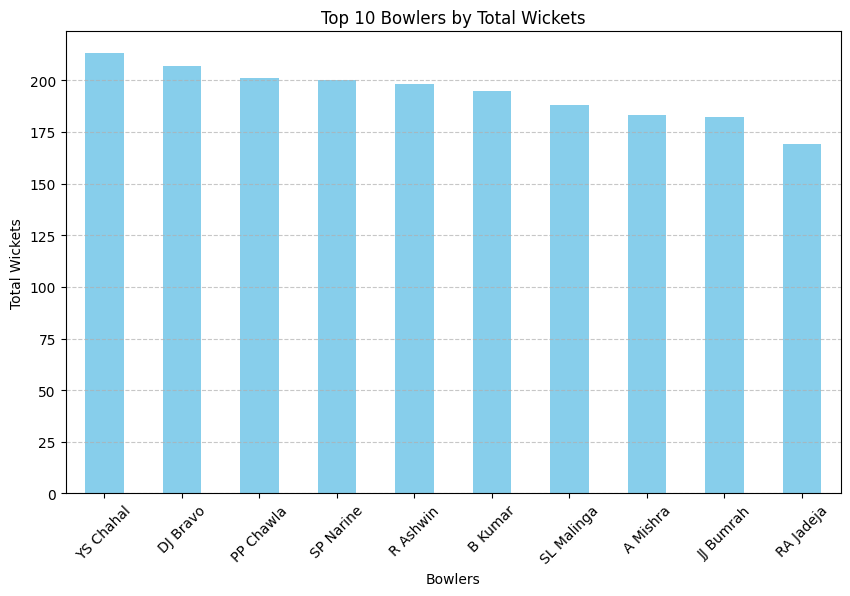

In [22]:
bowler_wickets = delivery[delivery['is_wicket'] == 1].groupby('bowler')['is_wicket'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
bowler_wickets.plot(kind='bar', color='skyblue')
plt.title('Top 10 Bowlers by Total Wickets')
plt.xlabel('Bowlers')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

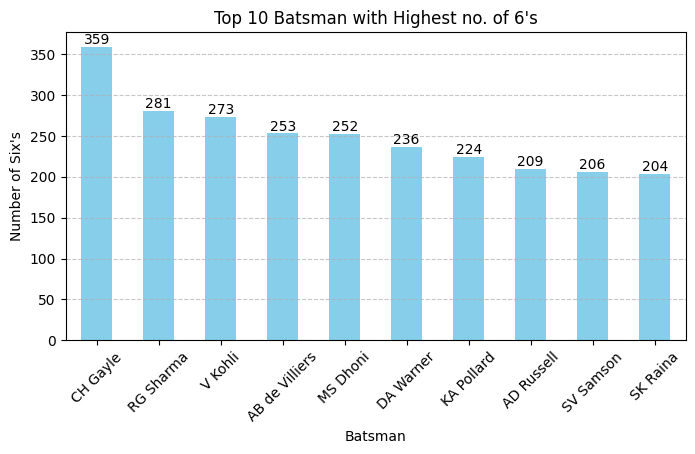

In [23]:
maxsix = delivery[delivery['batsman_runs'] == 6].groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(10)

# plotting 
plt.figure(figsize=(8,4))
ax = maxsix.plot(kind='bar', color='skyblue')

# Adding annotations
for i, value in enumerate(maxsix):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom')
plt.xlabel('Batsman')
plt.ylabel("Number of Six's")
plt.title("Top 10 Batsman with Highest no. of 6's")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [24]:
total_runs = delivery.groupby(['bowling_team', 'batter'])['batsman_runs'].sum().reset_index()

# Finding the top batsman with the maximum runs
top_batsman = total_runs.sort_values(by='batsman_runs', ascending=False)
top_batsman.drop_duplicates('bowling_team',keep='first')[['bowling_team', 'batter', 'batsman_runs']].head(16)

,bowling_team,batter,batsman_runs
1859,Kolkata Knight Riders,DA Warner,1093
319,Chennai Super Kings,S Dhawan,1057
2504,Mumbai Indians,KL Rahul,954
1441,Kings XI Punjab,DA Warner,906
3674,Royal Challengers Bangalore,DA Warner,861
4338,Sunrisers Hyderabad,SV Samson,801
3400,Rajasthan Royals,V Kohli,764
1107,Delhi Daredevils,V Kohli,761
674,Delhi Capitals,Ishan Kishan,436
2767,Pune Warriors,CH Gayle,383


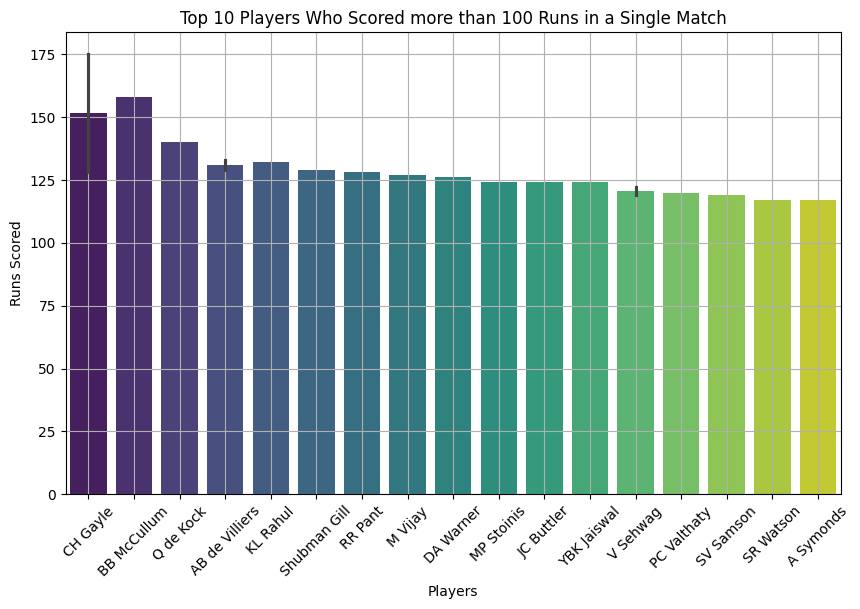

In [25]:
# Player Analysis: Players Who Scored 100 Runs
century_players = delivery.groupby(['match_id', 'batter'])['batsman_runs'].sum().reset_index()
century_players = century_players[century_players['batsman_runs'] >= 100]

# Get the top 20 players who scored 100 runs
top_century_players = century_players.sort_values(by='batsman_runs', ascending=False).head(20)

# Plot the top 20 players who scored 100 runs
plt.figure(figsize=(10, 6))
sns.barplot(data=top_century_players, x='batter', y='batsman_runs', palette='viridis')
plt.title('Top 10 Players Who Scored more than 100 Runs in a Single Match')
plt.xlabel('Players')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()